In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# London Weekday



In [2]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

In [3]:
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [4]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     4614 non-null   float64
 1   room_type                   4614 non-null   object 
 2   room_shared                 4614 non-null   bool   
 3   room_private                4614 non-null   bool   
 4   person_capacity             4614 non-null   float64
 5   host_is_superhost           4614 non-null   bool   
 6   multi                       4614 non-null   int64  
 7   biz                         4614 non-null   int64  
 8   cleanliness_rating          4614 non-null   float64
 9   guest_satisfaction_overall  4614 non-null   float64
 10  bedrooms                    4614 non-null   int64  
 11  dist                        4614 non-null   float64
 12  metro_dist                  4614 non-null   float64
 13  attr_index                  4614 

In [5]:
london.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,360.230348,2.832466,0.269397,0.422844,9.153013,90.324447,1.123754,5.325023,0.992739,296.466825,20.607738,629.790258,11.276920,-0.114886,51.503262
std,507.782888,1.240572,0.443695,0.494065,1.183012,11.755838,0.581591,2.720524,1.262465,172.440566,11.986535,389.953206,6.982438,0.068183,0.031465
min,64.676968,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040553,0.013904,68.740487,4.778228,140.521726,2.516159,-0.251700,51.416510
25%,167.454550,2.000000,0.000000,0.000000,9.000000,86.000000,1.000000,3.553956,0.317995,178.041401,12.375855,386.186620,6.914994,-0.171242,51.486300
50%,256.355982,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,4.899843,0.523462,251.181941,17.459935,530.331957,9.496036,-0.118225,51.509800
75%,435.452386,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.835232,1.047957,361.797354,25.148936,775.523995,13.886404,-0.067260,51.524698
max,15499.894165,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321206,9.286229,1438.618956,100.000000,5584.771840,100.000000,0.120180,51.575820


In [6]:
# Check any number of columns with NaN or missing values 
print(london.isnull().any().sum(), ' / ', len(london.columns))
# Check any number of data points with NaN
print(london.isnull().any(axis=1).sum(), ' / ', len(london))

0  /  19
0  /  4614


In [6]:
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

,room_type,room_shared,room_private,host_is_superhost,multi,biz,guest_satisfaction_overall
0,Entire home/apt,False,False,False,0,0,98.0
1,Private room,False,True,True,1,0,99.0
2,Private room,False,True,False,1,0,96.0
3,Private room,False,True,True,1,0,99.0
4,Private room,False,True,False,0,0,98.0
...,...,...,...,...,...,...,...
4609,Private room,False,True,False,0,0,100.0
4610,Entire home/apt,False,False,False,1,0,84.0
4611,Private room,False,True,False,0,0,97.0
4612,Private room,False,True,False,0,0,80.0


In [9]:
#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape


(4295, 19)

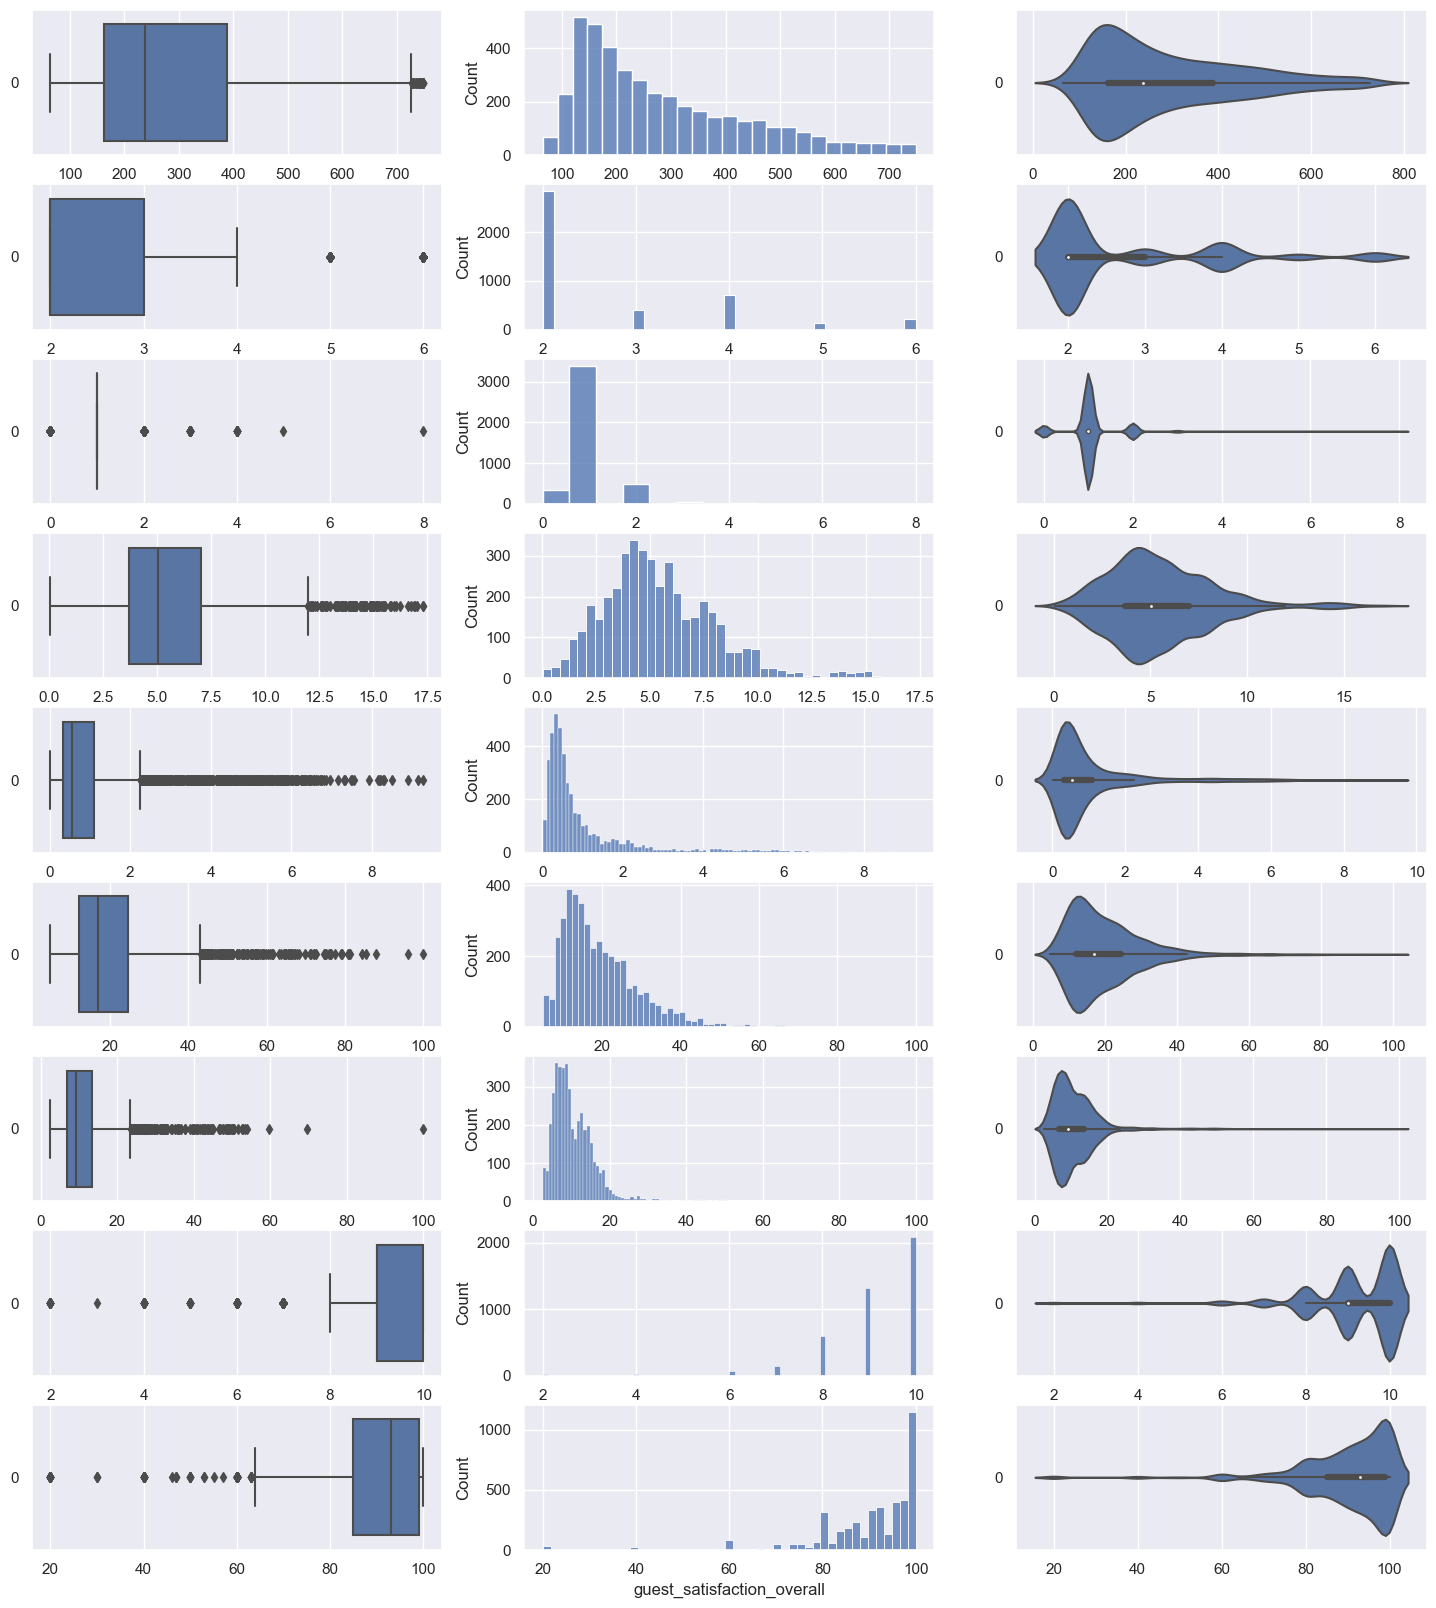

In [72]:
# Draw the distributions of numerical variables
f, axes = plt.subplots(9, 3, figsize=(18, 20))

#list of col 
numVar  = london[['realSum', 'person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'guest_satisfaction_overall']]
count = 0
for var in numVar:
    sb.boxplot(data = numVar[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numVar[var], ax = axes[count,1])
    sb.violinplot(data = numVar[var], orient = "h", ax = axes[count,2])
    count += 1

# Check relationship with realsum


                             realSum  person_capacity  bedrooms      dist  \
realSum                     1.000000         0.584821  0.305279 -0.333035   
person_capacity             0.584821         1.000000  0.494631 -0.050981   
bedrooms                    0.305279         0.494631  1.000000  0.095804   
dist                       -0.333035        -0.050981  0.095804  1.000000   
metro_dist                 -0.252222        -0.030217  0.103434  0.694842   
attr_index_norm             0.339179         0.042657 -0.093169 -0.808282   
rest_index_norm             0.342456         0.050694 -0.094948 -0.751562   
cleanliness_rating          0.011192        -0.103086  0.016474  0.074689   
guest_satisfaction_overall -0.050238        -0.105832  0.051625  0.101025   

                            metro_dist  attr_index_norm  rest_index_norm  \
realSum                      -0.252222         0.339179         0.342456   
person_capacity              -0.030217         0.042657         0.050694   
b

<Axes: >

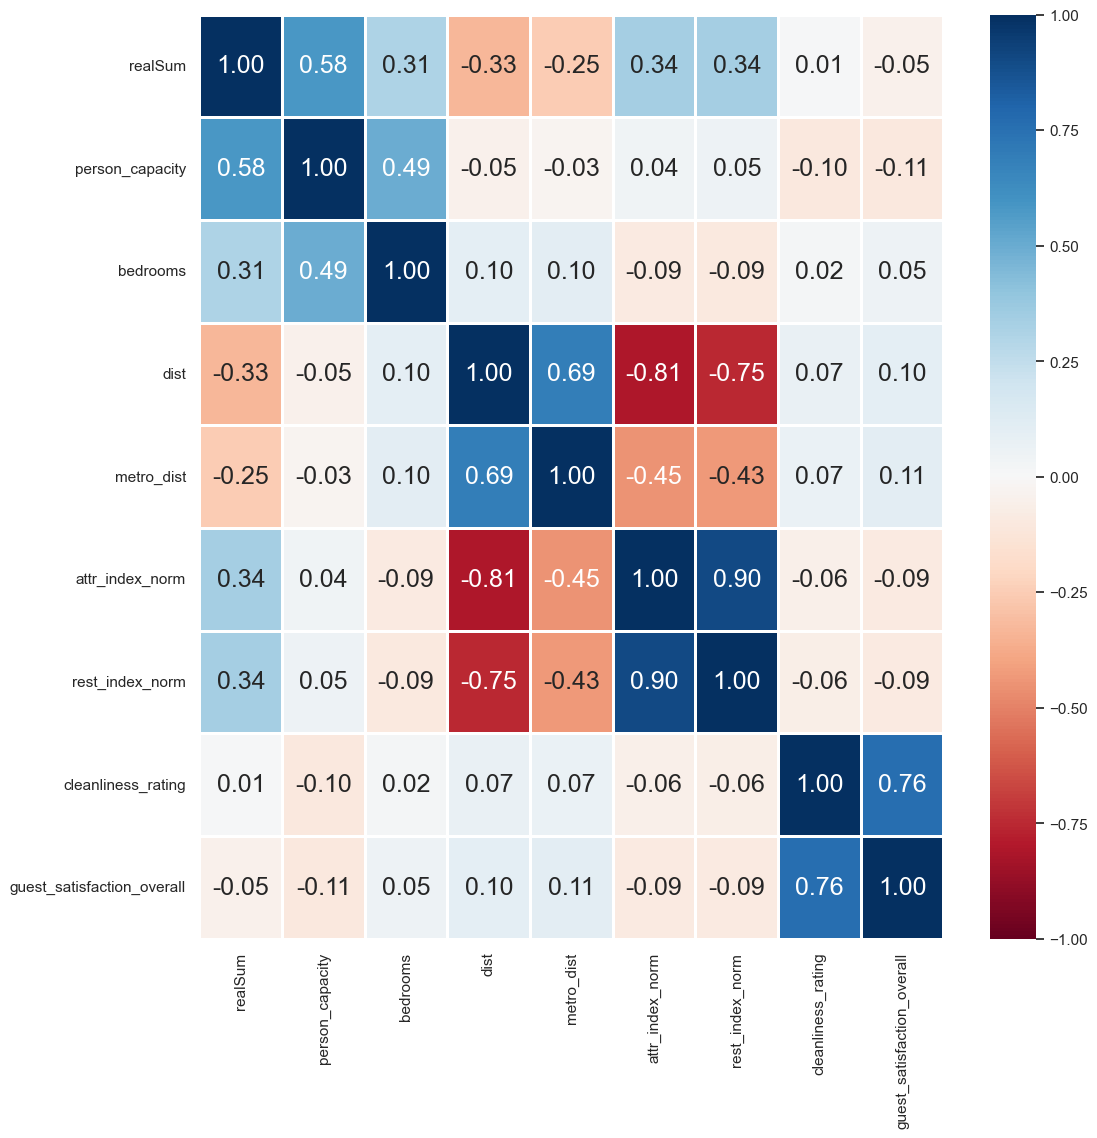

In [73]:
# Correlation Matrix
print(numVar.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numVar.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

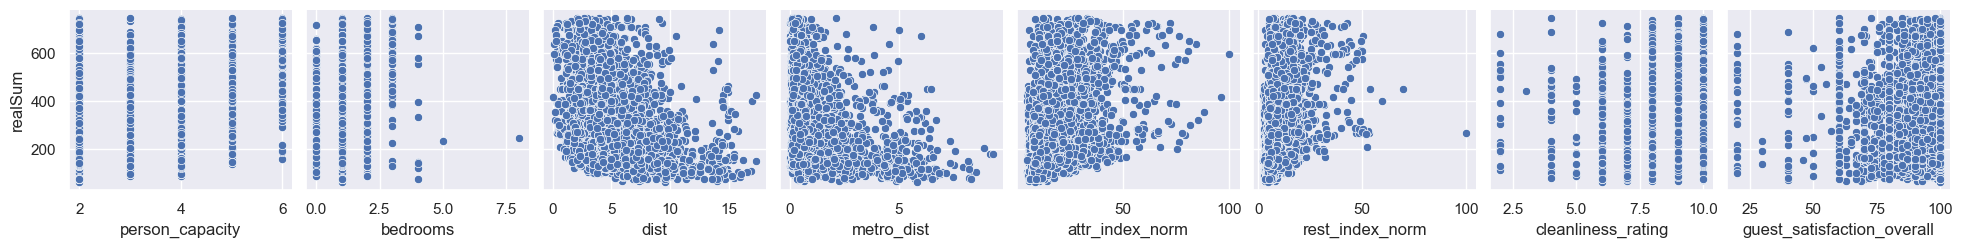

In [74]:
# Draw pairs of variables against one another
sb.pairplot(data = numVar, y_vars=['realSum'], x_vars=['person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'guest_satisfaction_overall'])

# Categorical Variables 

In [75]:
catVar = pd.DataFrame(london[['realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']])

In [76]:
catVar.head()

,realSum,room_type,room_shared,room_private,host_is_superhost,multi,biz
0,570.098074,Entire home/apt,False,False,False,0,0
1,297.984430,Private room,False,True,True,1,0
2,336.790611,Private room,False,True,False,1,0
3,226.722171,Private room,False,True,True,1,0
4,256.355982,Private room,False,True,False,0,0


In [77]:
def plot_cat(col):
    f = plt.figure(figsize=(16, 8))
    sb.boxplot(x = col, y = 'realSum', data = catVar, 
               order = catVar.groupby(col)['realSum'].median().sort_values().index)

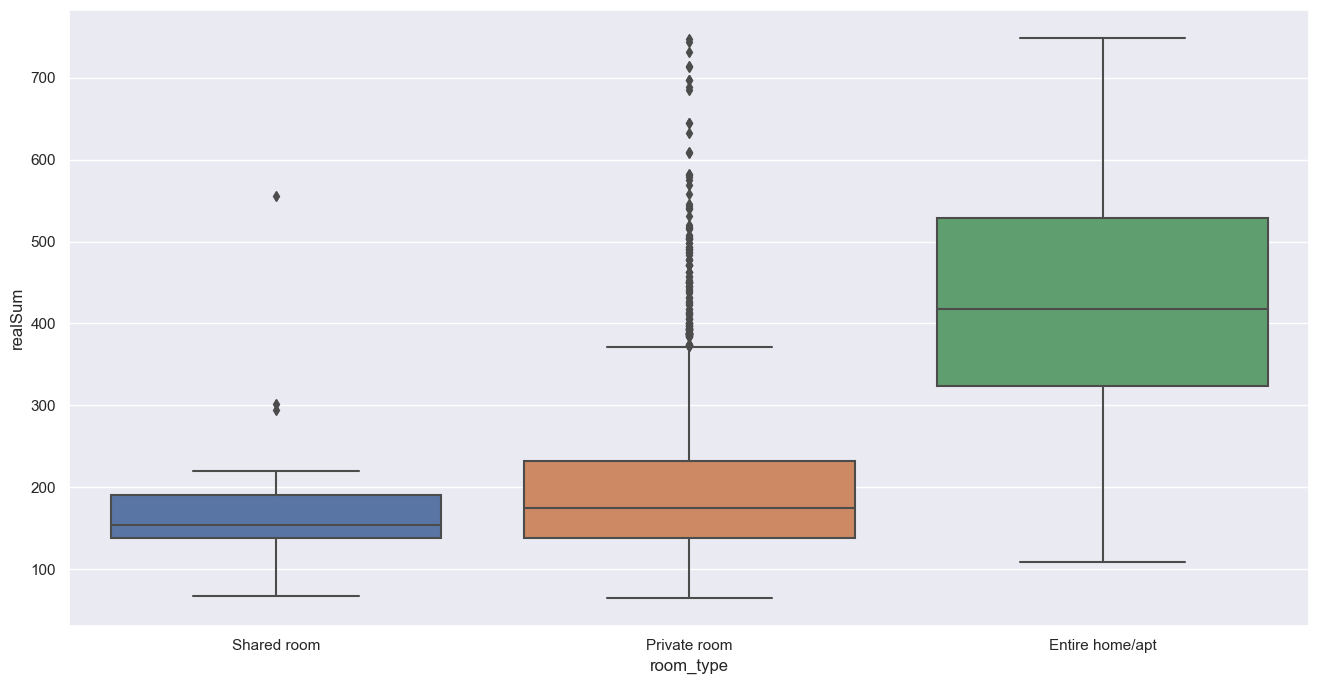

In [78]:
plot_cat('room_type')

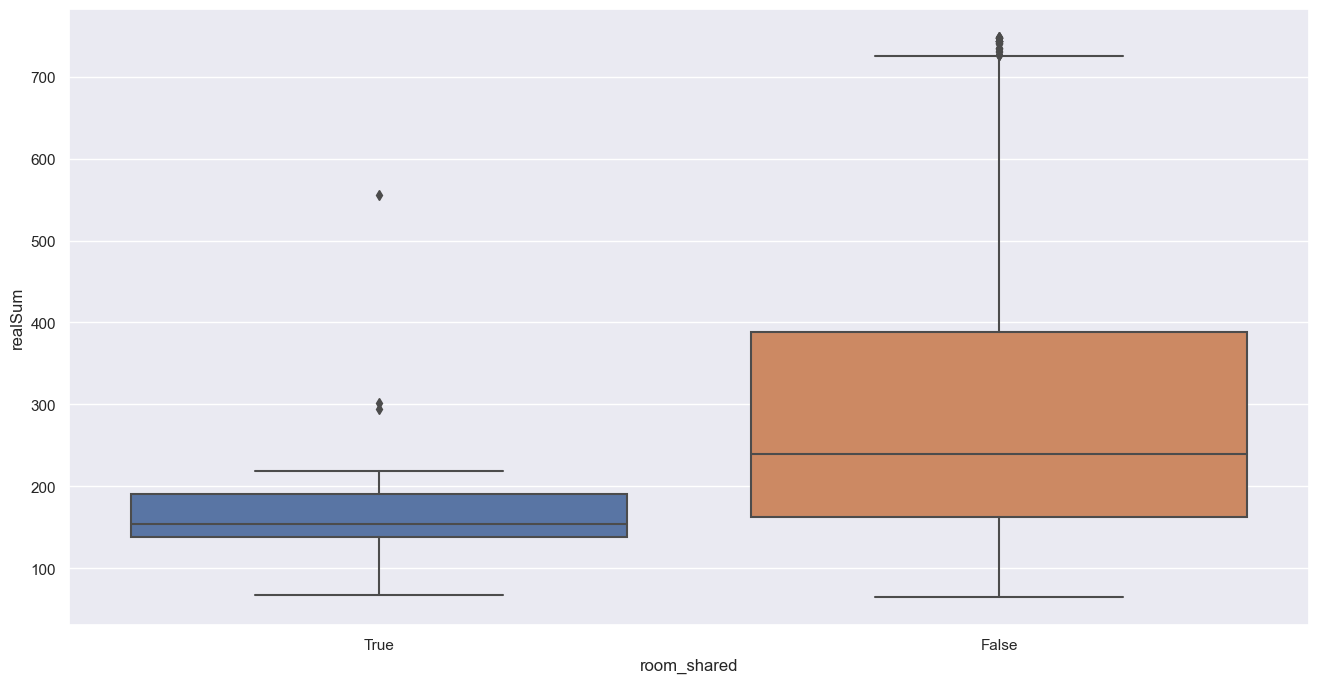

In [79]:
plot_cat('room_shared')

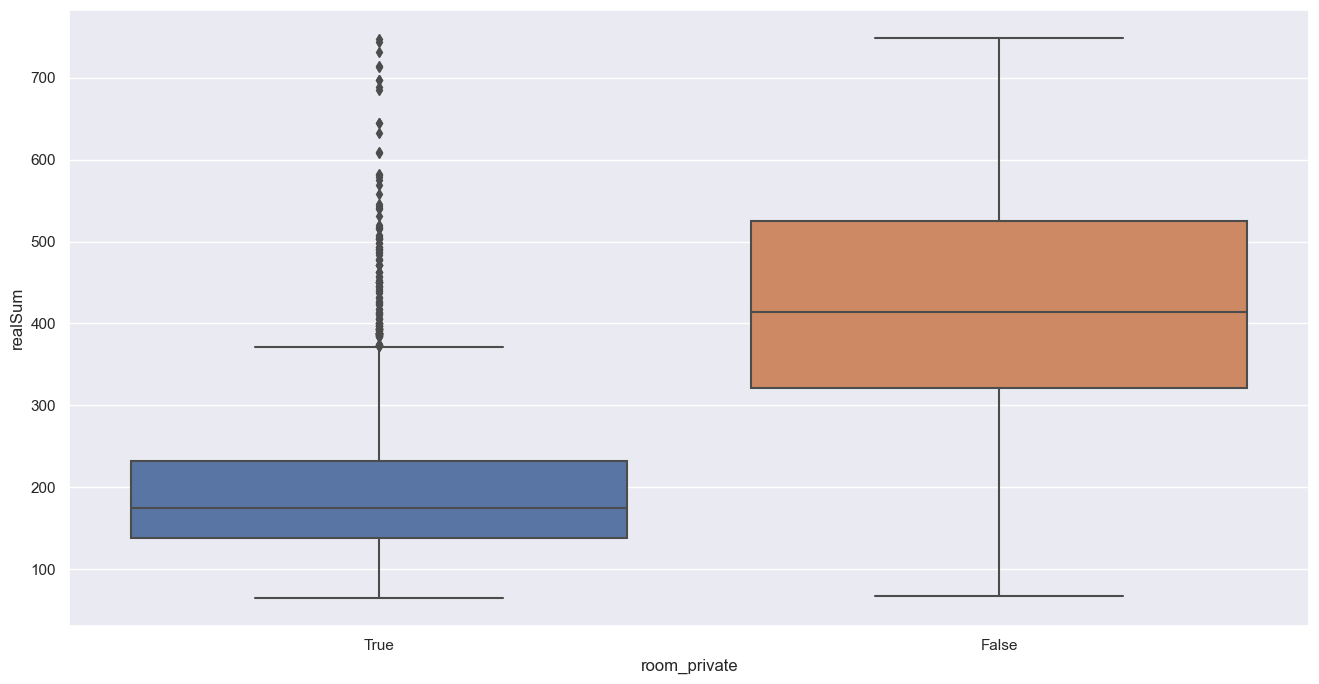

In [80]:
plot_cat('room_private')

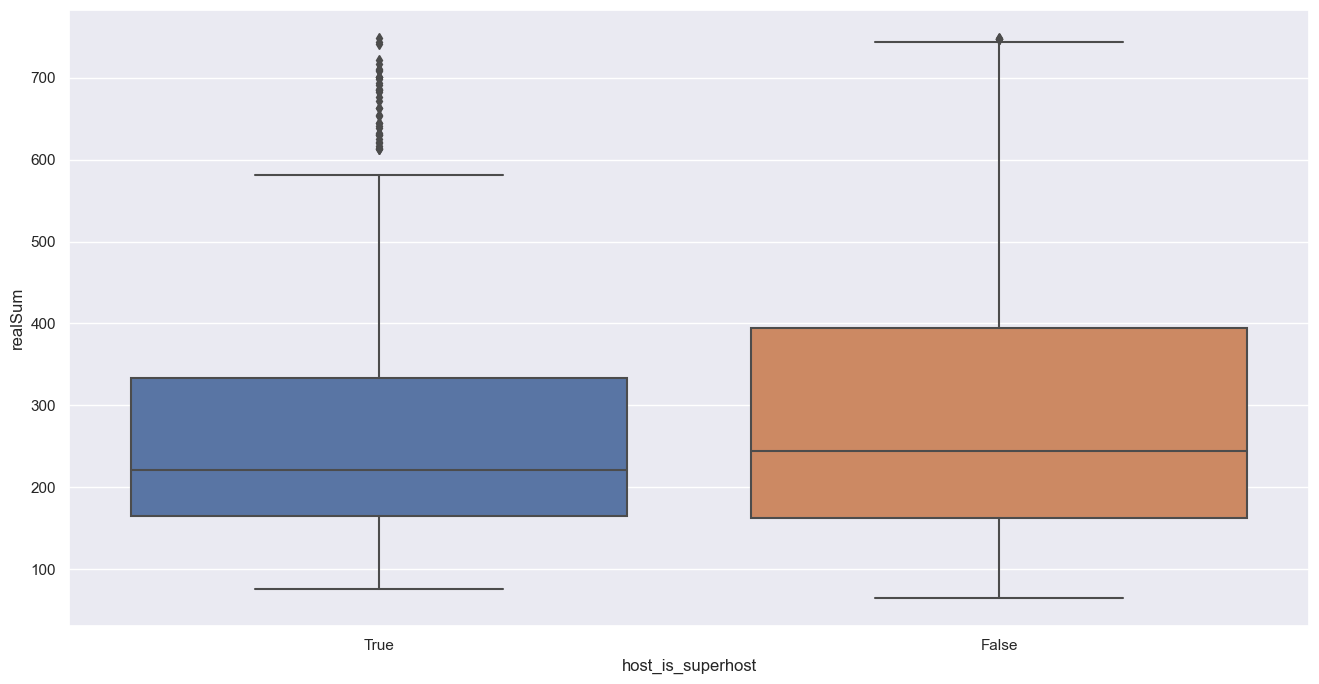

In [81]:
plot_cat('host_is_superhost')

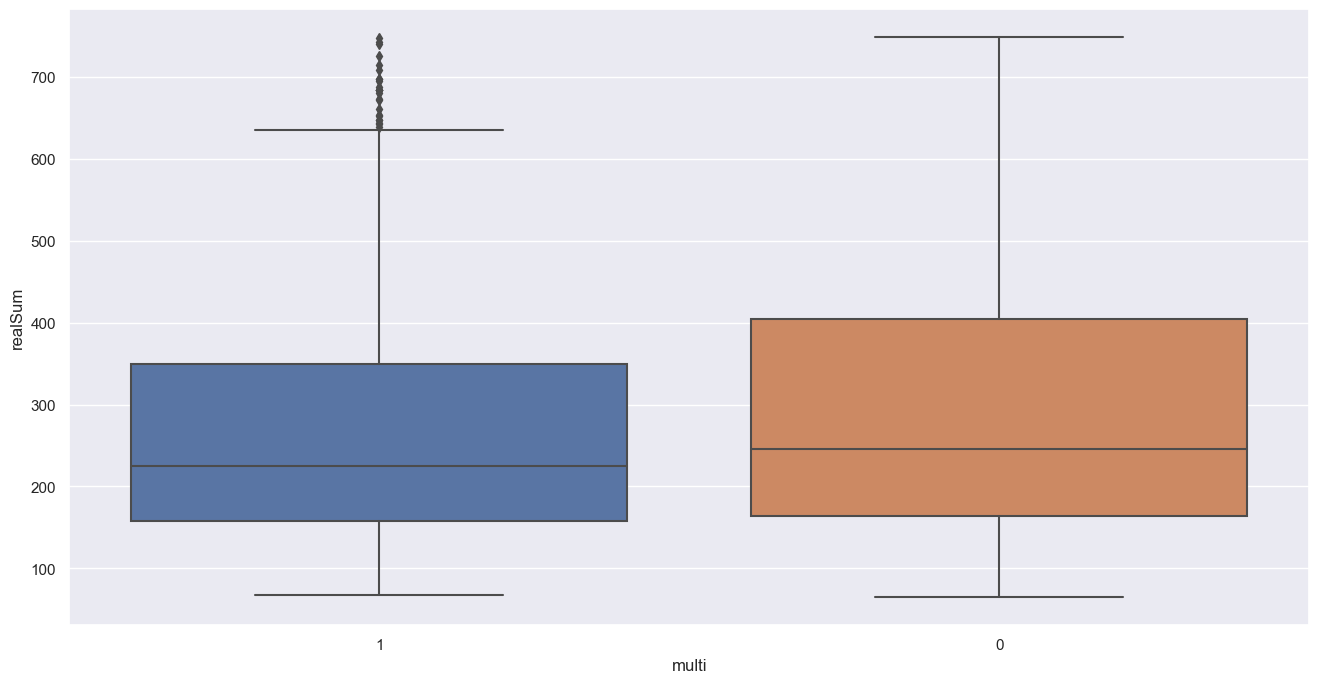

In [82]:
plot_cat('multi')

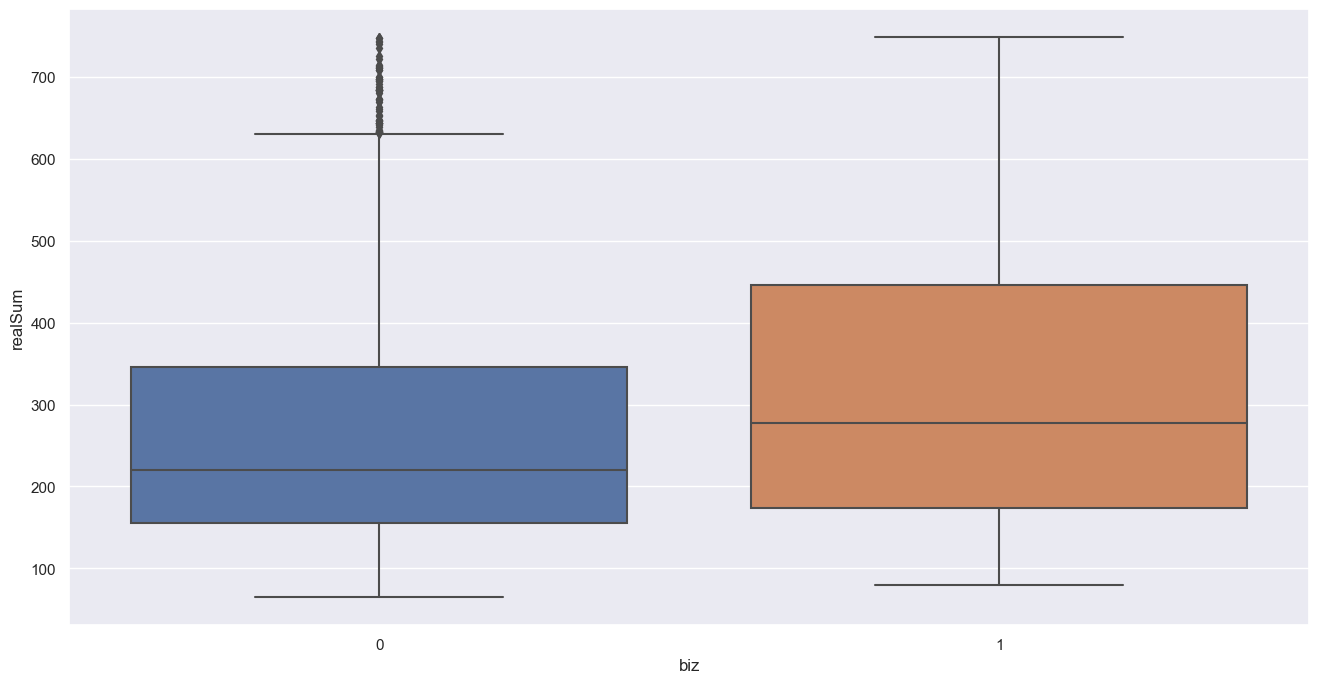

In [83]:
plot_cat('biz')